In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
from pandas.io.json import json_normalize
plt.style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['SimHei']  #解决seaborn中文字体显示问题
plt.rc('figure', figsize=(10, 10))  #把plt默认的图片size调大一点
plt.rcParams["figure.dpi"] = plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
%matplotlib inline

In [2]:
conn = MongoClient(host='127.0.0.1', port=27017)  # 实例化MongoClient
db = conn.get_database('Laborday')  

col = db.get_collection('items') # 连接到集合ticket
mon_data = col.find()  # 查询这个集合下的所有记录

In [3]:
data = json_normalize([rec for rec in mon_data])
data.shape

(57004, 31)

In [4]:
data.head()

,_id,city,fields.cityName,fields.comment,fields.discountPrice,fields.distance,fields.features,fields.featuresNew,fields.fromName,fields.h5_url,...,fields.sold365,fields.soldRecent,fields.soldRecentNum,fields.subTitle,fields.tagList,fields.title,fields.titleTagInfos,fields.type,src,trip_main_busness_type
0,5cea12ae2f35ad239cce190b,石家庄,None,None,81.2,None,"[{'key': '一句话描述', 'text': '千奇百怪的珊瑚，还能亲密触碰浅海动物，...",None,None,None,...,None,已售176笔,176,None,"[{'text': '5A景区', 'icon': None, 'borderColor':...",石家庄海洋公园,[],None,mix,scenic
1,5cea12ae2f35ad239cce190d,石家庄,None,None,88,None,"[{'key': '一句话描述', 'text': '水上过山车上尖叫声连连，还有模拟漂流、...",None,None,None,...,None,已售430笔,430,None,"[{'text': '4A景区', 'icon': None, 'borderColor':...",天山海世界,[],None,mix,scenic
2,5cea12ae2f35ad239cce190f,石家庄,None,None,35.8,None,"[{'key': '一句话描述', 'text': '依据中国古典文学名著《红楼梦》严格设计...",None,None,None,...,None,已售317笔,317,None,"[{'text': 'AAA', 'icon': None, 'borderColor': ...",荣国府,[],None,mix,scenic
3,5cea12ae2f35ad239cce1911,石家庄,None,None,185,None,"[{'key': '一句话描述', 'text': '参观小动物的同时还能体验跳楼机等各种刺...",None,None,None,...,None,已售81笔,81,None,[],辛玛王国,[],None,mix,scenic
4,5cea12ae2f35ad239cce1913,石家庄,None,None,56.8,None,"[{'key': '一句话描述', 'text': '爬山的运动量适中，地下罗汉堂一定要看啊...",None,None,None,...,None,已售108笔,108,None,"[{'text': '4A景区', 'icon': None, 'borderColor':...",抱犊寨,[],None,mix,scenic


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57004 entries, 0 to 57003
Data columns (total 31 columns):
_id                       57004 non-null object
city                      57004 non-null object
fields.cityName           0 non-null object
fields.comment            52509 non-null object
fields.discountPrice      57004 non-null object
fields.distance           0 non-null object
fields.features           57004 non-null object
fields.featuresNew        52509 non-null object
fields.fromName           0 non-null object
fields.h5_url             52509 non-null object
fields.itemId             57004 non-null object
fields.itemTotalScore     52509 non-null float64
fields.latitude           57004 non-null float64
fields.longitude          57004 non-null float64
fields.native_url         0 non-null object
fields.p_score            57004 non-null object
fields.pc_url             57004 non-null object
fields.picUrl             57004 non-null object
fields.price              57004 non-null

In [6]:
data.columns

Index(['_id', 'city', 'fields.cityName', 'fields.comment',
       'fields.discountPrice', 'fields.distance', 'fields.features',
       'fields.featuresNew', 'fields.fromName', 'fields.h5_url',
       'fields.itemId', 'fields.itemTotalScore', 'fields.latitude',
       'fields.longitude', 'fields.native_url', 'fields.p_score',
       'fields.pc_url', 'fields.picUrl', 'fields.price', 'fields.scm',
       'fields.shortInfo', 'fields.sold365', 'fields.soldRecent',
       'fields.soldRecentNum', 'fields.subTitle', 'fields.tagList',
       'fields.title', 'fields.titleTagInfos', 'fields.type', 'src',
       'trip_main_busness_type'],
      dtype='object')

In [7]:
col_keep = ['city', 'fields.comment', 'fields.discountPrice', 'fields.features', 'fields.itemId',
           'fields.itemTotalScore', 'fields.latitude', 'fields.longitude', 'fields.price',
           'fields.shortInfo', 'fields.sold365', 'fields.soldRecentNum', 'fields.tagList', 
            'fields.title', 'trip_main_busness_type']
data = data[col_keep]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57004 entries, 0 to 57003
Data columns (total 15 columns):
city                      57004 non-null object
fields.comment            52509 non-null object
fields.discountPrice      57004 non-null object
fields.features           57004 non-null object
fields.itemId             57004 non-null object
fields.itemTotalScore     52509 non-null float64
fields.latitude           57004 non-null float64
fields.longitude          57004 non-null float64
fields.price              57004 non-null object
fields.shortInfo          52509 non-null object
fields.sold365            34440 non-null object
fields.soldRecentNum      57004 non-null object
fields.tagList            57004 non-null object
fields.title              57004 non-null object
trip_main_busness_type    57004 non-null object
dtypes: float64(3), object(12)
memory usage: 6.5+ MB


In [9]:
data.isnull().sum()

city                          0
fields.comment             4495
fields.discountPrice          0
fields.features               0
fields.itemId                 0
fields.itemTotalScore      4495
fields.latitude               0
fields.longitude              0
fields.price                  0
fields.shortInfo           4495
fields.sold365            22564
fields.soldRecentNum          0
fields.tagList                0
fields.title                  0
trip_main_busness_type        0
dtype: int64

In [10]:
data.drop_duplicates(subset='fields.itemId', inplace=True)

In [11]:
# 由于np.nan是float，所以这里整体转换为float
data.loc[data['fields.comment'].isnull(), 'fields.comment'] = np.nan
data['fields.comment'] = data['fields.comment'].astype(float)

In [12]:
data['fields.discountPrice'] = data['fields.discountPrice'].astype(float)

In [13]:
data['fields.itemId'] = data['fields.itemId'].astype(float)

In [14]:
# fields.features清洗
def get_fea_text(data):
    if len(data) > 0:
        return data[0]['text']
    else:
        return None

data['fields.features'] = data['fields.features'].apply(get_fea_text)

In [15]:
data['fields.sold365'].sample(5)

22643    已售785笔
29287      None
32138      None
8014      已售19笔
16299     已售34笔
Name: fields.sold365, dtype: object

In [16]:
# fields.sold365清洗
def get_sold365(data):
    if data is None:
        return np.nan
    if "万" in data:
        return float(data[data.find('售')+1:data.find('万')]) * 10000
    else:
        return float(data[data.find('售')+1:data.find('笔')])

    
data['fields.sold365'] = data['fields.sold365'].apply(get_sold365)

In [17]:
data['fields.tagList'].sample(5)

48952    []
49627    []
15770    []
55214    []
2370     []
Name: fields.tagList, dtype: object

In [18]:
# fields.tagList清洗
data['fields.tagList'] = data['fields.tagList'].apply(get_fea_text)

In [19]:
city_data = pd.read_csv('../data/city_data.csv')
city_data.head()

,city,province
0,石家庄,河北省
1,邯郸,河北省
2,唐山,河北省
3,保定,河北省
4,秦皇岛,河北省


In [20]:
data_final = data.merge(city_data, on='city')

In [21]:
data_final.sample(5)

,city,fields.comment,fields.discountPrice,fields.features,fields.itemId,fields.itemTotalScore,fields.latitude,fields.longitude,fields.price,fields.shortInfo,fields.sold365,fields.soldRecentNum,fields.tagList,fields.title,trip_main_busness_type,province
6170,常州,20.0,190.0,15:30前可订今日票,5.376042e+11,4.9,0.000,0.000,190,常州,145.0,91,None,淹城野生动物园自驾车票(不含门票)淹城野生动物园门票自驾车票,vocation,江苏省
3965,哈尔滨,NaN,175.0,漂流那里面隔着玻璃能看见海豚，室外造浪池也好玩哦。,2.314700e+04,NaN,45.883,126.686,175,None,NaN,2194,5A景区,波塞冬海洋王国,scenic,黑龙江省
9837,杭州,1.0,63.0,14:00前可订今日票,5.875303e+11,5.0,0.000,0.000,63,杭州,6.0,4,None,西湖游船（上岛）+钱王祠,vocation,浙江省
15805,厦门,2.0,123.0,20:00前可订今日票,5.805521e+11,3.7,0.000,0.000,123,厦门,6.0,0,None,【当天可购，快速入园】福建厦门杏博湾天沐温泉度假村 温泉票 HP,vocation,福建省
41729,大理,0.0,180.0,最早可定明日票,5.874762e+11,0.0,0.000,0.000,180,大理,NaN,0,None,【永诚国旅】云南 大理 苍山洗马潭索道 半程索道 大门票+直通车,vocation,云南省


In [22]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50510 entries, 0 to 50509
Data columns (total 16 columns):
city                      50510 non-null object
fields.comment            46631 non-null float64
fields.discountPrice      50510 non-null float64
fields.features           50252 non-null object
fields.itemId             50510 non-null float64
fields.itemTotalScore     46631 non-null float64
fields.latitude           50510 non-null float64
fields.longitude          50510 non-null float64
fields.price              50510 non-null object
fields.shortInfo          46631 non-null object
fields.sold365            29897 non-null float64
fields.soldRecentNum      50510 non-null object
fields.tagList            3477 non-null object
fields.title              50510 non-null object
trip_main_busness_type    50510 non-null object
province                  50510 non-null object
dtypes: float64(7), object(9)
memory usage: 6.6+ MB


# 问题 
    1.哪些城市/省份的旅游选择最多？
    2.哪些城市最受游客青睐？
    3.最热门的景点
    4.各省份的好评热门景点
    5.很热门但是评分不好的景点
    6.打折力度最大的景点
    7.各级别景区的门票价格

In [23]:
#1. 哪些城市/省份的旅游选择最多？
count_top12 = data_final['fields.shortInfo'].value_counts()[:12]
count_top12

三亚    2878
杭州    1932
上海    1626
桂林    1575
北京    1542
广州    1375
厦门    1181
香港     968
清远     954
成都     890
苏州     869
重庆     781
Name: fields.shortInfo, dtype: int64

<BarContainer object of 12 artists>

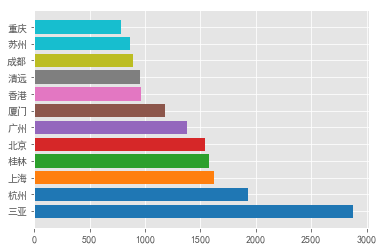

In [24]:
colors = colors = [plt.cm.tab10(i/float(len(count_top12.index)-1)) for i in range(len(count_top12.index))]
plt.barh(count_top12.index, count_top12.values, color=colors)

In [26]:
from pyecharts import Funnel

funnel = Funnel("旅游选择最多的前12个城市", width = 800,height=600)
funnel.add("", count_top12.index, count_top12.values, legend_top=30,
           xaxis_label_textsize=20, yaxis_label_textsize=14, is_label_show=True,
          )
funnel.render('旅游选择最多的前12个城市.html')

<BarContainer object of 10 artists>

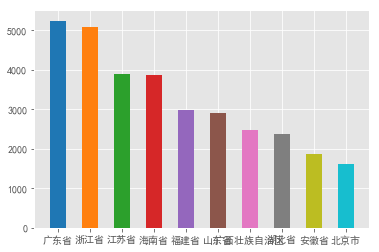

In [27]:
count_province_top10 = data_final['province'].value_counts()[:10]
colors = colors = [plt.cm.tab10(i/float(len(count_province_top10.index)-1)) for i in range(len(count_province_top10.index))]
plt.bar(count_province_top10.index, count_province_top10.values, color = colors, width=.5)

In [28]:
province = [pro.replace("省", "") for pro in list(count_province_top10.index)]
province = [pro.replace("市", "") for pro in province]

In [29]:
province = ['广东','浙江','海南','江苏','山东','福建','广西','湖北','北京','安徽','四川','云南',
            '辽宁','河北','上海','河南','江西','陕西','重庆','香港','湖南','澳门','黑龙江','甘肃',
            '天津','贵州','山西','宁夏','吉林','内蒙古','台湾','西藏',
            '新疆','青海']

In [ ]:
count_province = data_final['province'].value_counts()

In [45]:
from pyecharts import Map


map = Map("全国各省份旅游选择数量图", width=600, height=600)
map.add(
    "",
    province,
    count_province.values,
    maptype="china",
    is_visualmap=True,
    visual_text_color="#000",
    visual_range=[0, 5000]
)
map.render('全国各省份旅游选择数量图.html')

In [50]:
data_final['fields.soldRecentNum'] = data_final['fields.soldRecentNum'].astype(float)

In [51]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50510 entries, 0 to 50509
Data columns (total 16 columns):
city                      50510 non-null object
fields.comment            46631 non-null float64
fields.discountPrice      50510 non-null float64
fields.features           50252 non-null object
fields.itemId             50510 non-null float64
fields.itemTotalScore     46631 non-null float64
fields.latitude           50510 non-null float64
fields.longitude          50510 non-null float64
fields.price              50510 non-null object
fields.shortInfo          46631 non-null object
fields.sold365            29897 non-null float64
fields.soldRecentNum      50510 non-null float64
fields.tagList            3477 non-null object
fields.title              50510 non-null object
trip_main_busness_type    50510 non-null object
province                  50510 non-null object
dtypes: float64(8), object(8)
memory usage: 6.6+ MB


In [53]:
#2. 哪些城市最受游客青睐？
city_sale_top10 = data_final.groupby('fields.shortInfo')['fields.soldRecentNum'].sum().nlargest(10)
city_sale_top10

fields.shortInfo
杭州    194201.0
上海    122045.0
北京     95357.0
香港     63626.0
广州     60347.0
苏州     41347.0
南京     38094.0
西安     35226.0
嘉兴     29037.0
成都     28732.0
Name: fields.soldRecentNum, dtype: float64

In [55]:
from pyecharts import Bar

bar = Bar("最近一个月售出门票Top10城市", width = 700,height=500)
bar.add("", city_sale_top10.index, city_sale_top10.values, is_stack=True, 
       xaxis_label_textsize=18, yaxis_label_textsize=14, is_label_show=True,
       xaxis_rotate=20)
bar.render('最近一个月售出门票Top10城市.html')

In [56]:
city_favor_count = data_final[(data_final['fields.itemTotalScore'] > 0)&
                              (data_final['fields.comment'] > 30)
                             ].groupby('fields.shortInfo')['fields.itemTotalScore'].count()

In [58]:
city_qual = list(city_favor_count[city_favor_count > 30].index)

In [59]:
city_favor_top10 = data_final[(data_final['fields.itemTotalScore'] > 0)&
                              (data_final['fields.comment'] > 30)&
                              (data_final['fields.shortInfo'].isin(city_qual))
                             ].groupby('fields.shortInfo')['fields.itemTotalScore'].mean().nlargest(20)
city_favor_top10

fields.shortInfo
济南     4.950000
澳门     4.944444
武汉     4.944000
海口     4.943243
南京     4.938542
北京     4.937850
大连     4.935000
常州     4.932432
杭州     4.929444
香港     4.926984
无锡     4.926829
福州     4.921127
秦皇岛    4.919444
成都     4.916800
苏州     4.915789
重庆     4.914035
绍兴     4.913514
珠海     4.912500
黄山     4.911765
宁波     4.909195
Name: fields.itemTotalScore, dtype: float64

In [60]:
from pyecharts import WordCloud
name, value = city_favor_top10.index, city_favor_top10.values*10-30
wordcloud = WordCloud(width=500, height=500)
wordcloud.add("", name, value, word_size_range=[20, 80])
wordcloud.render('最受游客青睐的10个城市.html')

In [61]:
#3. 最热门的景点
data_final.sort_values(by='fields.soldRecentNum', 
                      ascending=False)[:12][['fields.title', 'fields.soldRecentNum']]

,fields.title,fields.soldRecentNum
46438,上海迪士尼度假区,193120.0
8511,灵隐飞来峰,130877.0
8639,【当天可订 官方品质】杭州西湖灵隐飞来峰（不含灵隐寺） 门票,129134.0
48745,香港迪士尼乐园,80419.0
27035,广州长隆野生动物世界,43676.0
44341,故宫博物院,41082.0
30799,珠海长隆海洋王国,36824.0
44342,北京世界园艺博览会,32223.0
46441,上海野生动物园,31543.0
38240,东方明珠广播电视塔,31169.0


In [63]:
hot_scene_top12 = data_final.sort_values(by='fields.soldRecentNum', 
                      ascending=False)[:12][['fields.title', 'fields.soldRecentNum']]
from pyecharts import Bar
bar = Bar("最热门的12个景点", width = 700,height=600)
bar.add("", hot_scene_top12['fields.title'], hot_scene_top12['fields.soldRecentNum'], is_stack=True, 
       xaxis_label_textsize=16, yaxis_label_textsize=14, is_label_show=True,
       xaxis_rotate=25)
bar.render('最热门的12个景点.html')

In [64]:
#4. 各省份的好评热门景点
def get_top1(data):
    return data.head(1)

In [66]:
province_top1 = data_final.sort_values(by=['province', 'fields.itemTotalScore', 'fields.soldRecentNum'], 
                      ascending=False).groupby('province').apply(get_top1)[['fields.title', 'fields.soldRecentNum', 'fields.itemTotalScore']].reset_index()
province_top1.drop(columns = 'level_1', inplace = True)
province_top1.rename(columns={'province':'省份', 'fields.title':'项目名', 
                             'fields.soldRecentNum':'销售数量', 'fields.itemTotalScore':'评分'}, 
                    inplace=True)
province_top1

,省份,项目名,销售数量,评分
0,上海市,上海迪士尼乐门票 上海迪士尼乐园门票1日票 迪斯尼门票,10014.0,5.0
1,云南省,l 【电子票】云南昆明七彩云南欢乐世界门票 古滇欢乐世界,625.0,5.0
2,内蒙古自治区,内蒙古 呼和浩特 大召寺 大门票 呼和浩特旅游 大召寺门票,65.0,5.0
3,北京市,[古北水镇-大门票]官方自营快速入园,7625.0,5.0
4,台湾,台北“故宫博物院“ 门票 二维码扫码入园电子票,352.0,5.0
5,吉林省,长春5A级景区【净月潭国家森林公园】官方电子门票 直接入园,149.0,5.0
6,四川省,成都熊猫基地门票 大熊猫繁育研地究基地大门票,6511.0,5.0
7,天津市,【官方门票】天津方特欢乐世界门票 刷身份证入园,1049.0,5.0
8,宁夏回族自治区,l【电子票】 宁夏银川镇北堡西部影视城大门票 华夏西部影城,440.0,5.0
9,安徽省,九华山天台索道上下联票天台索道票 即拍即用刷二维码乘坐,2371.0,5.0


In [67]:
province_top1.sort_values(by='销售数量', ascending=False)

,省份,项目名,销售数量,评分
19,浙江省,【当天可订 官方品质】杭州西湖灵隐飞来峰（不含灵隐寺） 门票,129134.0,5.0
0,上海市,上海迪士尼乐门票 上海迪士尼乐园门票1日票 迪斯尼门票,10014.0,5.0
15,江苏省,【当天可订|刷身份证】南京总统府景区门票南京总统府门票电子票,8782.0,5.0
3,北京市,[古北水镇-大门票]官方自营快速入园,7625.0,5.0
6,四川省,成都熊猫基地门票 大熊猫繁育研地究基地大门票,6511.0,5.0
30,陕西省,西安旅游 西安兵马俑博物馆门票 兵马俑门票兵马俑大门票秦始皇陵,6445.0,5.0
31,青海省,青海景点门票青藏高原野生动物园西宁野生动物园西藏动物园门票,6276.0,5.0
21,湖北省,【当天可订】湖北武汉黄鹤楼门票二维码入园随订随进成人电子票,5041.0,5.0
25,福建省,【官方旗舰店】菽庄花园门票成人票 厦门鼓浪屿景区景点门票飞猪,4595.0,5.0
20,海南省,【东方明珠门票 快速通道 即买即用】I AM SALLY 看上海·速通票,2644.0,5.0


In [68]:
#5. 热门但是评分不太高的景点
data_final[(data_final['fields.soldRecentNum']>100)&
          (data_final['fields.itemTotalScore']<4.5)&
          (data_final['fields.itemTotalScore']>0)][['fields.shortInfo', 'fields.title', 'fields.soldRecentNum', 'fields.itemTotalScore']]

,fields.shortInfo,fields.title,fields.soldRecentNum,fields.itemTotalScore
4487,哈尔滨,官方实力出票-哈尔滨万达融创乐园/疯狂启城/10人起定/价格优惠,218.0,4.3
16612,厦门,厦门科技馆门票套票主展厅+虫现江湖雨林,104.0,4.1
17929,漳州,福建漳州云水谣古镇大门票（今日可用） 成人儿童学生老人门票,171.0,4.4
22590,泰安,泰安太阳部落门票|太阳部落直通车|门票+往返车费|当天可订,120.0,4.4
23810,驻马店,河南 驻马店 金顶山景区 大门票,102.0,4.4
24676,武汉,【随时可定】武汉海昌极地海洋世界门票海洋公园海洋馆含萌宠乐园,175.0,4.1
24788,襄阳,夜场88元起 随时定 湖北襄阳中国唐城影视基地门票 襄阳唐城门票,182.0,4.3
25284,咸宁,【快速取票】咸宁九宫山门票 /九宫山套票石龙峡索道票当天可预订,225.0,4.3
32508,桂林,【可选接送】桂林阳朔游漓江杨堤九马画山至兴坪竹筏漂流门票船票,162.0,4.2
35053,三亚,出票块，VIP通道上岛！西岛门票+往返船票 赠送免税店班车接送,113.0,3.4


In [71]:
data_final['fields.price'] = data_final['fields.price'].astype(float)

In [72]:
#6. 打折力度最大的景点
data_final['discount'] = np.round((1 - (data_final['fields.price'] - 
                               data_final['fields.discountPrice'])/data_final['fields.price'])*10, 1)
dis_data = data_final.sort_values(by='discount')[['fields.discountPrice',
                                                            'fields.price',
                                                            'discount',
                                                            'fields.title',
                                                            'fields.shortInfo']]

dis_data.head(15)

,fields.discountPrice,fields.price,discount,fields.title,fields.shortInfo
40574,188.0,1580.00,1.2,【可定当天】云南华侨城温泉水公园 禄丰恐龙谷等11景无限次入园,昆明
35402,25.0,99.00,2.5,当天可订，三亚夜游三亚湾扬帆之星号夜游三亚湾门票,三亚
30705,13.5,50.00,2.7,ZM【当天可定】广东 东莞南社明清古村落 成人儿童老人观光大门票,东莞
31312,27.0,100.00,2.7,ZM【当天可定 即定即用】 广东中山詹园 成人儿童老人亲子大门票,中山
31080,14.0,50.00,2.8,ZM【当天可定 即定即用】广东 珠海农科奇观 成人儿童观光大门票,珠海
30857,598.0,1980.00,3.0,【598元/10次卡】超值钜惠 珠海海泉湾海洋温泉10次卡 可4人使用,珠海
27886,31.0,100.00,3.1,ZM【当天8点半前可定】广东 广州岭南印象园 成人亲子大门票,广州
39079,18.0,53.10,3.4,【双人特价 电子票】成都大熊猫基地门票成都大熊猫繁育研究基地,成都
28943,33.9,100.00,3.4,ZY【当天可定即定即用】广东清远九龙峰林小镇 成人儿童老人门票,清远
29123,34.5,100.00,3.4,ZY【提前1小时下单】广东 清远田野绿世界 成人儿童老人大门票,清远


(0, 150)

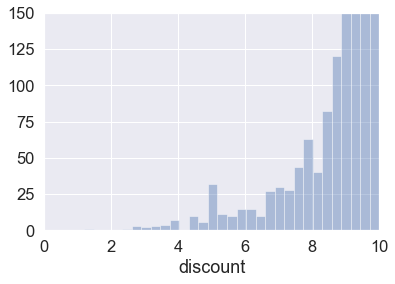

In [73]:
sns.set(font_scale=1.5)
g = sns.distplot(dis_data['discount'], kde=False)
g.set_xlim(0, 10)
g.set_ylim(0, 150)

In [74]:
dis_data[dis_data['discount']<7].groupby('fields.shortInfo')['fields.title'].count().nlargest(5)

fields.shortInfo
三亚    18
桂林    18
上海    12
香港    10
成都     8
Name: fields.title, dtype: int64

In [75]:
#7. 各级别景区的门票价格
level = ['A', 'AA', 'AAA', '4A景区', '5A景区']
level_data = data_final.groupby('fields.tagList')['fields.price'].mean()[level]
level_data

fields.tagList
A        63.366667
AA       75.804000
AAA     111.303371
4A景区     80.954498
5A景区    125.875803
Name: fields.price, dtype: float64

In [76]:
data_final.groupby('fields.tagList')['fields.price'].mean()

fields.tagList
4A景区      80.954498
5A景区     125.875803
A         63.366667
AA        75.804000
AAA      111.303371
今日可用     150.082857
可订今日票     87.451198
山         95.000000
明日可用     138.720000
景点       137.183784
演出       250.000000
赛事       365.000000
Name: fields.price, dtype: float64

In [77]:
bar = Bar("各级别景区的门票价格", width = 500,height=500)
bar.add("", level_data.index, np.round(level_data.values,0), is_stack=True, 
       xaxis_label_textsize=18, yaxis_label_textsize=14, is_label_show=True)
bar.render('各级别景区的门票价格.html')